## Table of Contents

1. [Dataset Used](#data)  
2. [Aggregate functions](#aggregate)  
    2.1 [COUNT](#count)  
    2.2 [SUM](#sum)  
    2.3 [MIN MAX](#minmax)  
    2.4 [AVG](#avg)   
    2.5 [GROUP BY](#group)  
    2.6 [HAVING](#having)   
3. [CASE statement](#case)    
    3.1 [Using CASE with aggregate functions](#caseaggregate)   
    3.2 [Using CASE inside of aggregate functions](#caseinaggregate)  
4. [DISTINCT](#distinct)
5. [SQL Joins](#join)  
    5.1 [Types of Joins](#types)  
    5.2 [UNION](#union)  
    5.3 [Self Join and Join with Comparison Operators](#self)  
    

### 1. Dataset Used <a id ="data"></a>

In [1]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [2]:
import pandas as pd
df1 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\stockdata.csv")

In [3]:
# Dataframe size
df1.shape

(1259, 8)

In [4]:
df1.columns

Index(['date', 'year', 'month', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [5]:
df1.dtypes

date       object
year        int64
month       int64
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [6]:
df1.to_sql('stocks', con=engine)

### 2. Aggregate functions <a id="aggregate"></a>
In order to perform operations on two columns, numerical operators can be used directly but in order to perform operations on rows, aggregate functions are used.    

**COUNT** counts how many rows are in a particular column.  
**SUM** adds together all the values in a particular column.  
**MIN** and **MAX** return the lowest and highest values in a particular column, respectively.  
**AVG** calculates the average of a group of selected values.  

### 2.1 COUNT <a id="count"></a>
#### Counting all rows
COUNT is a SQL aggregate function for counting the number of rows in a particular column.

In [7]:
pd.read_sql("""SELECT COUNT(*) as Count
            FROM stocks""",engine)

,Count
0,1259


#### Counting all rows based on a specific column

In [8]:
pd.read_sql("""SELECT COUNT(close) as Count
            FROM stocks""",engine)

,Count
0,1259


The number of rows are less as COUNT function only counts the number of non-null rows in a column.

#### Counting non-numerical columns

In [9]:
pd.read_sql("""SELECT COUNT(date) as Count
            FROM stocks""",engine)

,Count
0,1259


### 2.2 SUM <a id="sum"></a>
It is an aggregate function in SQL that calculates the total of all rows in a given column. SUM takes into consideration the null rows as well and considers null rows as zero. It can be used only for numerical columns.

In [10]:
pd.read_sql("""SELECT SUM(volume) as Volume
            FROM stocks""",engine)

,Volume
0,11822414547


### 2.3 MIN/MAX <a id="minmax"></a>
MIN function returns the minimum or lowest value in a specific column while MAX function returns the maximum or highest value in a specific column.  

#### Filter for the day when volume of stocks traded was highest.

In [11]:
pd.read_sql("""SELECT *,
            MAX(volume) as "Maximum Volume"
            FROM stocks
            """,engine)

,index,date,year,month,open,high,low,close,volume,Maximum Volume
0,531,20/3/2015,2015,3,55.19,56.05,54.86,55.76,137767165,137767165


#### Note : Aggregate functions cannot be used in a WHERE clause.

In [12]:
pd.read_sql("""SELECT *
            FROM stocks
            WHERE volume = MAX(volume)
            """,engine)

OperationalError: (sqlite3.OperationalError) misuse of aggregate function MAX() [SQL: 'SELECT *\n            FROM stocks\n            WHERE volume = MAX(volume)\n            '] (Background on this error at: http://sqlalche.me/e/e3q8)

In [14]:
pd.read_sql("""SELECT date,
            MAX(volume) as "Maximum Volume"
            FROM stocks 
            WHERE open < close
            """,engine)

,date,Maximum Volume
0,20/3/2015,137767165


This returns the day when maximum volume of stocks were traded subject to the constraint that opening price is less than the closing price. First, the data is filtered for the condition and then the aggregate funcion runs.

#### Filter for the day when the opening price was lowest.

In [15]:
pd.read_sql("""SELECT date,
            MIN(open) as "Minimum Opening Price"
            FROM stocks
            """,engine)

,date,Minimum Opening Price
0,26/2/2013,13.14


### 2.4 AVG <a id="avg"></a>
AVG is a SQL aggregate function that calculates the average of a selected group of values. It ignore null rows completely and it can be used only for numerical columns. 

In [16]:
pd.read_sql("""SELECT
            AVG(close) as "Average Closing Price"
            FROM stocks
            """,engine)

,Average Closing Price
0,38.393252


### 2.5 GROUP BY <a id = "group"></a>
In case we want to find aggregate for different subsets or subgroups of the main dataset, then GROUP BY clause is used. The data is first grouped on the basis of the specified column and then the aggregate function is applied.

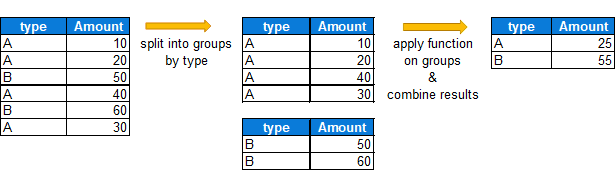

#### Calculate the yearly average volume of stocks traded.

In [17]:
pd.read_sql("""SELECT year as"Year",
            AVG(close) as "Average Volume"
            FROM stocks
            GROUP BY year
            """,engine)

,Year,Average Volume
0,2013,18.601549
1,2014,38.923550
2,2015,45.121607
3,2016,38.183829
4,2017,47.490717
5,2018,54.280000


#### Calculate the monthly average closing price for each year.

In [18]:
pd.read_sql("""SELECT year AS "Year",
            month AS "Month", 
            AVG(close) as "Average Closing Price"
            FROM stocks
            GROUP BY 1,2
            ORDER BY YEAR DESC, MONTH DESC
            LIMIT 13""",engine)

,Year,Month,Average Closing Price
0,2018,2,51.664000
1,2018,1,54.902857
2,2017,12,51.150500
3,2017,11,47.587143
4,2017,10,50.756364
5,2017,9,45.894500
6,2017,8,47.343043
7,2017,7,52.027000
8,2017,6,49.410000
9,2017,5,45.961818


### 2.6 HAVING <a id="having"></a>
HAVING clause is used with the GROUP BY clause. WHERE cannot be used with GROUP BY and thus HAVING clause is used to filter the data when data is grouped.


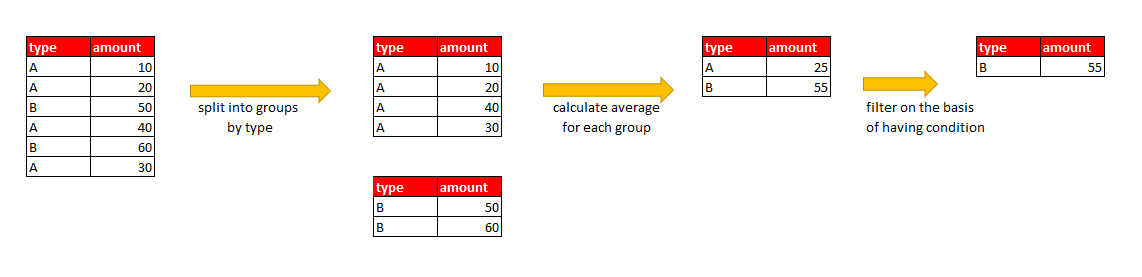

#### Find the average monthly volume of stocks traded where the volume traded is greater than 60 lakh stocks.

In [39]:
pd.read_sql("""SELECT year,
                month,
                AVG(volume) AS month_high
                FROM stocks
                GROUP BY year, month
                HAVING AVG(volume) > 6000000
                ORDER BY year, month 
                LIMIT 10""", engine)


,year,month,month_high
0,2013,2,1.124254e+07
1,2013,3,9.358335e+06
2,2013,4,6.915250e+06
3,2013,8,9.938864e+06
4,2013,11,1.225300e+07
5,2013,12,1.557024e+07
6,2014,1,1.383271e+07
7,2014,2,1.040264e+07
8,2014,3,9.264907e+06
9,2014,4,1.220776e+07


#### QUESTION

Can WHERE clause and HAVING clause be used together in a query?

#### Find the average volume and maximum of high price where the monthly maximum high price is greater than Rs 50 and opening price is less than closing price.

In [40]:
# first data is filtered on the basis of the where condition
# then grouped on the basis of year and month
# then maximum high price is calculated for each group
# these rows are then filtered to show only those months for which the maximum high price is greater than 50
# WHERE -> GROUP -> AGGREGATE FUNCTION -> HAVING

pd.read_sql("""SELECT year,
                month,
                AVG(volume) AS month_volume,
                MAX(high) AS month_high
                FROM stocks
                WHERE open < close
                GROUP BY year, month
                HAVING MAX(high) > 50
                ORDER BY year, month """, engine)


,year,month,month_volume,month_high
0,2014,12,1.419592e+07,53.7000
1,2015,1,1.285081e+07,55.9800
2,2015,2,1.256218e+07,51.5550
3,2015,3,2.230975e+07,56.0500
4,2015,4,1.084871e+07,53.4700
5,2015,5,1.001026e+07,50.3000
6,2016,12,6.089602e+06,50.6400
7,2017,6,5.260662e+06,51.8700
8,2017,7,6.301456e+06,54.4800
9,2017,8,5.931690e+06,50.9200


### Query Clause Order
1. SELECT
2. FROM
3. WHERE
4. GROUP BY
5. HAVING
6. ORDER BY

### 3. CASE statement <a id="case"></a>
It is similar to if/then statement in Excel. It can be used to divide the data into separate categories based on a condition. 


In [21]:
pd.read_sql("""SELECT month, year, low,
            CASE WHEN month <= 6 THEN "First Half" ELSE "Second Half" END AS "Category"
            FROM stocks
            WHERE month=6 
            LIMIT 10""", engine)

,month,year,low,Category
0,6,2013,17.40,First Half
1,6,2013,17.56,First Half
2,6,2013,16.85,First Half
3,6,2013,15.93,First Half
4,6,2013,16.65,First Half
5,6,2013,17.05,First Half
6,6,2013,16.75,First Half
7,6,2013,16.65,First Half
8,6,2013,16.64,First Half
9,6,2013,16.81,First Half


* The CASE statement always goes in the SELECT clause
* CASE must include the following components: WHEN, THEN, and END. ELSE is an optional component.
* You can make any conditional statement using any conditional operator (like WHERE ) between WHEN and THEN. This includes stringing together multiple conditional statements using AND and OR.
* You can include multiple WHEN statements, as well as an ELSE statement to deal with any unaddressed conditions.

### 3.1 Using CASE with aggregate functions <a id="caseaggregate"></a>
Sometimes, we would want to divide the data into distinct categories and then perform aggregation on one of the columns. It is similar to applying group by clause on a column already existing in the data. 

#### Calculate the average volume traded every six months in every year.

In [22]:
pd.read_sql("""SELECT year, CASE WHEN month <= 6 THEN "First Half" 
                ELSE "Second Half" END AS "Category",
                AVG(volume) AS "volume"
                FROM stocks
                GROUP BY 1,2 """, engine)

,year,Category,volume
0,2013,First Half,7.429971e+06
1,2013,Second Half,8.792098e+06
2,2014,First Half,1.183722e+07
3,2014,Second Half,1.294132e+07
4,2015,First Half,1.351129e+07
5,2015,Second Half,9.658800e+06
6,2016,First Half,1.016430e+07
7,2016,Second Half,8.184250e+06
8,2017,First Half,6.688840e+06
9,2017,Second Half,5.061181e+06


### 3.2 Using CASE inside of aggregate functions <a id="caseinaggregate"></a>

In [23]:
pd.read_sql("""SELECT year, 
                AVG(CASE WHEN month <= 6 THEN volume ELSE NULL END) AS "First half",
                AVG(CASE WHEN month > 6 THEN volume ELSE NULL END) AS "Second half"
                FROM stocks
                GROUP BY 1 """, engine)

,year,First half,Second half
0,2013,7.429971e+06,8.792098e+06
1,2014,1.183722e+07,1.294132e+07
2,2015,1.351129e+07,9.658800e+06
3,2016,1.016430e+07,8.184250e+06
4,2017,6.688840e+06,5.061181e+06
5,2018,5.734882e+06,NaN


### 4. DISTINCT <a id="distinct"></a>

In [24]:
pd.read_sql("""SELECT DISTINCT year FROM stocks ORDER by year""", engine)

,year
0,2013
1,2014
2,2015
3,2016
4,2017
5,2018


### 5. SQL Joins <a id="join"></a>

Sometimes, we have to work with two or more tables in a relational database and analyse results. Tables in a relational database are connected to each other by a common identifier or field. 
#### Twitter example

#### Table 1 - Orders
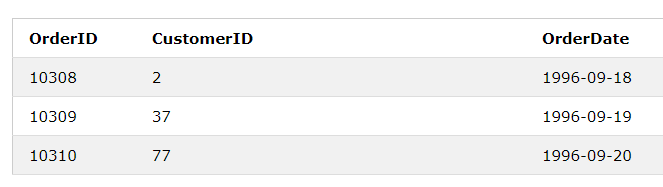

#### Table 2 - Customers
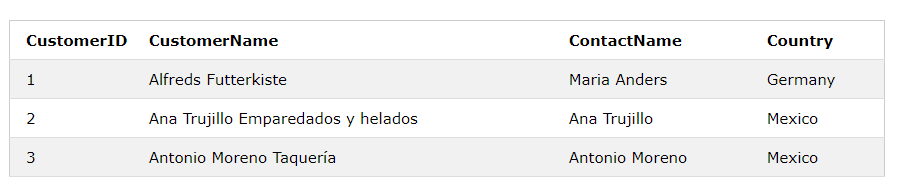

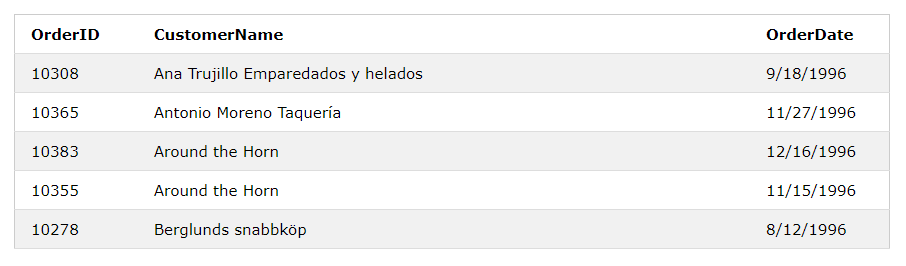

### 5.1 Types of Joins <a id = "types"></a>

There are different types of join operators:

1. Inner Join returns the matched entries from both the tables and ignore other entries.
2. Left Join returns all entries from the left table along with the matched entries from the right table. Values for any entry which exists in the left table but does not exist in the right table will be null.
3. Right join returns all entries from the rght table along with the matched entries from the left table. Values for any entry which exists in the right table but does not exist in the left table will be null.
4. Full Join returns all the entries from both the tables.

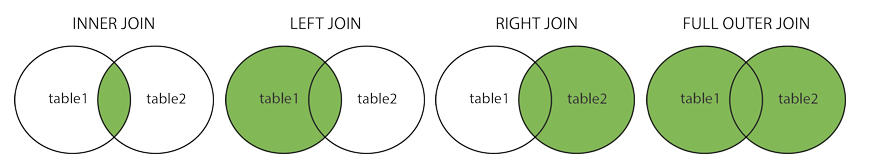

In [25]:
df2 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\players.csv")
df2.to_sql('players', con=engine)

In [26]:
df2.columns

Index(['full_school_name', 'school_name', 'player_name', 'position', 'height',
       'weight', 'year', 'hometown', 'state', 'id'],
      dtype='object')

In [27]:
df3 = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\teams.csv")
df3.to_sql('teams', con=engine)

In [28]:
df3.columns

Index(['division', 'conference', 'school_name', 'roster_url', 'id'], dtype='object')

In [29]:
pd.read_sql("""SELECT * FROM players LIMIT 0""", engine)

,index,full_school_name,school_name,player_name,position,height,weight,year,hometown,state,id


In [30]:
pd.read_sql("""SELECT * FROM teams LIMIT 0""", engine)

,index,division,conference,school_name,roster_url,id


In [31]:
pd.read_sql("""SELECT players.*, teams.conference
            FROM players 
            JOIN teams 
            ON players.school_name = teams.school_name 
            LIMIT 5""", engine)

,index,full_school_name,school_name,player_name,position,height,weight,year,hometown,state,id,conference
0,0,Cincinnati Bearcats,Cincinnati,Ralph Abernathy,RB,67,161,JR,"ATLANTA, GA",GA,1,American Athletic
1,1,Cincinnati Bearcats,Cincinnati,Mekale McKay,WR,78,195,SO,"LOUISVILLE, KY",KY,2,American Athletic
2,2,Cincinnati Bearcats,Cincinnati,Trenier Orr,CB,71,177,SO,"WINTER GARDEN, FL",FL,3,American Athletic
3,3,Cincinnati Bearcats,Cincinnati,Bennie Coney,QB,75,216,FR,"PLANT CITY, FL",FL,4,American Athletic
4,4,Cincinnati Bearcats,Cincinnati,Johnny Holton,WR,75,190,JR,"MIAMI, FL",FL,5,American Athletic


#### Find the average weight of players in every conference.

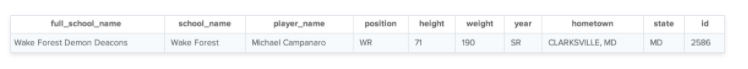

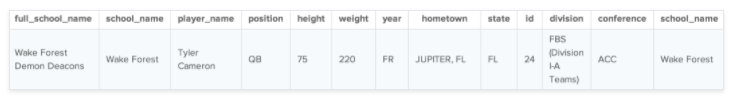

In [32]:
pd.read_sql("""SELECT teams.conference, AVG(players.weight) AS "Average Weight"
            FROM players
            JOIN teams
            ON teams.id = players.id
            GROUP BY 1
            ORDER BY 2
            LIMIT 5""", engine)

,conference,Average Weight
0,American Athletic,183.100000
1,Ohio Valley,189.444444
2,Big 12,189.900000
3,Big Sky,194.769231
4,Southern,195.555556


#### Write a query that displays player names, school names and conferences for schools in the "FBS (Division I-A Teams)" division.

In [33]:
pd.read_sql("""SELECT players.player_name, players.school_name, teams.conference, teams.division
            FROM players
            JOIN teams
            ON players.school_name = teams.school_name
            AND teams.division = "FBS (Division I-A Teams)" 
            LIMIT 5""", engine)

,player_name,school_name,conference,division
0,Aaron Brown,Cincinnati,American Athletic,FBS (Division I-A Teams)
1,Adam Dempsey,Cincinnati,American Athletic,FBS (Division I-A Teams)
2,Adrian Witty,Cincinnati,American Athletic,FBS (Division I-A Teams)
3,Alex Chisum,Cincinnati,American Athletic,FBS (Division I-A Teams)
4,Alex Pace,Cincinnati,American Athletic,FBS (Division I-A Teams)


#### QUESTION
Write a query that will JOIN these two tables so that all rows from Table 1 are in the result. What kind of JOIN would be used?
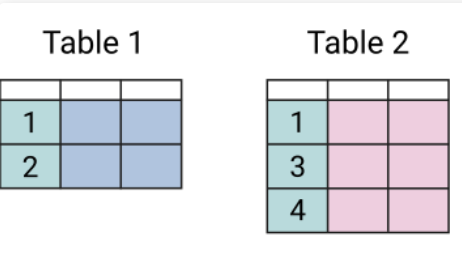

### 5.2 UNION <a id="union"></a>
SQL joins allow you to combine two datasets side-by-side, but UNION allows you to stack one dataset on top of the other.

In [34]:
## Creating two subsets of the players dataset

subset1 = df2.iloc[1:10, :]
subset2 = df2.iloc[11:20, :]
subset1.to_sql('players1', con=engine)
subset2.to_sql('players2', con = engine)

In [35]:
pd.read_sql("""SELECT * from players1
            UNION
            SELECT * from players2""", engine)

,index,full_school_name,school_name,player_name,position,height,weight,year,hometown,state,id
0,1,Cincinnati Bearcats,Cincinnati,Mekale McKay,WR,78,195,SO,"LOUISVILLE, KY",KY,2
1,2,Cincinnati Bearcats,Cincinnati,Trenier Orr,CB,71,177,SO,"WINTER GARDEN, FL",FL,3
2,3,Cincinnati Bearcats,Cincinnati,Bennie Coney,QB,75,216,FR,"PLANT CITY, FL",FL,4
3,4,Cincinnati Bearcats,Cincinnati,Johnny Holton,WR,75,190,JR,"MIAMI, FL",FL,5
4,5,Cincinnati Bearcats,Cincinnati,Howard Wilder,DB,71,180,JR,"SEA ISLAND, GA",GA,6
5,6,Cincinnati Bearcats,Cincinnati,Munchie Legaux,QB,77,200,SR,"NEW ORLEANS, LA",LA,7
6,7,Cincinnati Bearcats,Cincinnati,Mark Barr,WR,73,163,FR,"FORT LAUDERDALE, FL",FL,8
7,8,Cincinnati Bearcats,Cincinnati,Aaron Brown,CB,71,172,FR,"MIAMI, FL",FL,9
8,9,Cincinnati Bearcats,Cincinnati,Anthony McClung,WR,73,177,SR,"INDIANAPOLIS, IN",IN,10
9,11,Cincinnati Bearcats,Cincinnati,Mike Tyson,S,74,200,SR,"NORFOLK, VA",VA,12


### 5.3 Self Join and Join with Comparison Operators <a id ="self"></a>

When the join operator is applied on the same table, then it is called Self Join.


SELECT A.CustomerName AS CustomerName1, B.CustomerName AS CustomerName2, A.City  
FROM Customers A, Customers B  
WHERE A.CustomerID <> B.CustomerID  
AND A.City = B.City  
ORDER BY A.City;  

In [36]:
data = pd.read_csv(r"D:\Documents\Internships\GymCounselor\SQL RKT\employee.csv")
data.to_sql('employee', engine)

In [37]:
pd.read_sql("""SELECT * from employee""", engine)

,index,id,employee_name,department_id,manager_id
0,0,1,Montgomery Burns,4,NaN
1,1,2,Waylon Smithers,1,1.0
2,2,3,Homer Simpson,2,1.0
3,3,4,Carl Carlson,5,1.0
4,4,5,Lenny Leonard,3,1.0


In [38]:
pd.read_sql("""SELECT
e.employee_name AS 'Employee',
m.employee_name AS 'Manager'
FROM employee e
LEFT JOIN employee m ON m.id = e.manager_id""", engine)

,Employee,Manager
0,Montgomery Burns,None
1,Waylon Smithers,Montgomery Burns
2,Homer Simpson,Montgomery Burns
3,Carl Carlson,Montgomery Burns
4,Lenny Leonard,Montgomery Burns
